# 数据入库

In [1]:
import json
# extern_link/ps_paths.json解析
with open('extern_link/ps_paths.json', 'r') as f:
    ps_paths = json.load(f)
print("Loaded ps_paths:", ps_paths)

Loaded ps_paths: ['/home/lidonghaowsl/develop_win/hdd/Source/20250815BBL不同封装稳定性', '/home/lidonghaowsl/develop_win/hdd/Source/20250830', '/home/lidonghaowsl/develop_win/hdd/Source/20250904', '/home/lidonghaowsl/develop_win/hdd/Source/20250909', '/home/lidonghaowsl/develop_win/hdd/Source/20250915', '/home/lidonghaowsl/develop_win/hdd/Source/20250923', '/home/lidonghaowsl/develop_win/hdd/Source/20250923-2']


In [2]:
from catalog import UnifiedExperimentManager
import logging
from logger_config import log_manager, get_module_logger
# 配置日志
log_manager.set_levels(
    file_level=logging.WARNING,
    console_level=logging.WARNING
)
logger = get_module_logger()
manager = UnifiedExperimentManager('catalog_config.yaml')


In [ ]:
for path in ps_paths:
    print(f"Processing path: {path}")
    result = manager.process_data_pipeline(
        source_directory=path,
        clean_json=True,
        num_workers=20,
        conflict_strategy='skip',
        auto_extract_features=True,
        show_progress=True
    )
    print(f"Processing result for {path}: {result}")

Processing path: /home/lidonghaowsl/develop_win/hdd/Source/20250815BBL不同封装稳定性


Folders:   0%|          | 0/12 [00:00<?, ?folder/s]

In [1]:

from catalog import UnifiedExperimentManager

manager = UnifiedExperimentManager('catalog_config.yaml')

# 强制全量扫描，重新处理所有文件关联
print("执行全量重新扫描...")
result = manager.catalog.scan_and_index(incremental=False)

print(f"全量扫描完成:")
print(f"  - 处理文件: {result.files_processed}")
print(f"  - 新增记录: {result.files_added}")
print(f"  - 更新记录: {result.files_updated}")

# 验证关联结果
experiments = manager.search()
feature_count = sum(1 for exp in experiments if exp.has_features())
print(f"  - 有特征的实验: {feature_count}/{len(experiments)}")

执行全量重新扫描...
全量扫描完成:
  - 处理文件: 160
  - 新增记录: 0
  - 更新记录: 80
  - 有特征的实验: 76/80


# 数据查询

In [1]:
from catalog import quick_start

# 一键启动，自动加载配置
manager = quick_start()
print(f"当前有 {len(manager.search())} 个实验")

当前有 80 个实验


In [2]:
# 多条件查询
specific_experiments = manager.search(
    chip_id="#20250829012",
    device_id="2",
    # created_after="2025-09-16",
    # test_unit_id="Test Unit A2"
)
print(f"符合条件的实验有 {len(specific_experiments)} 个")
# 获取第一个实验的详细信息
if specific_experiments:
    exp = specific_experiments[0]
    print(f"实验ID: {exp.test_id}")
    print(f"状态: {exp.status}")
    print(f"完成度: {exp.completion_percentage}%")
    print(f"有特征文件: {exp.has_features()}")

符合条件的实验有 1 个
实验ID: test_20250917201531_eaf885e2
状态: completed
完成度: 100.0%
有特征文件: True


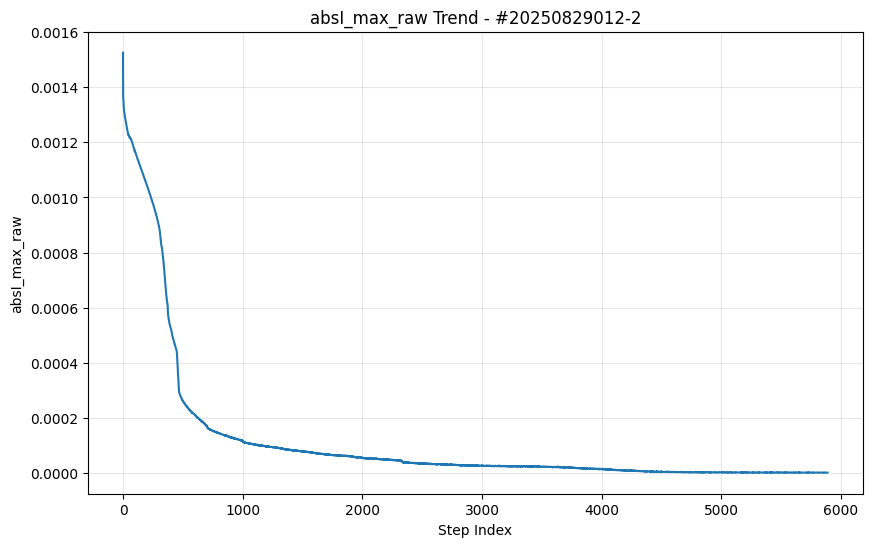

In [4]:
fig = exp.plot_feature_trend('absI_max_raw','transfer')

In [18]:
print(specific_experiments)

[UnifiedExperiment(id=91, chip_id='NA', device_id='NA', test_id='test_20250918144907_19adc361', status='completed', completion=100.0%), UnifiedExperiment(id=93, chip_id='NA', device_id='NA', test_id='test_20250918144907_59f55f8e', status='completed', completion=100.0%), UnifiedExperiment(id=94, chip_id='NA', device_id='NA', test_id='test_20250918144907_8c647e27', status='completed', completion=100.0%), UnifiedExperiment(id=85, chip_id='NA', device_id='NA', test_id='test_20250918144906_246019c2', status='completed', completion=100.0%), UnifiedExperiment(id=84, chip_id='NA', device_id='NA', test_id='test_20250918144906_4dc08386', status='completed', completion=100.0%), UnifiedExperiment(id=92, chip_id='NA', device_id='NA', test_id='test_20250918144906_f75b1937', status='completed', completion=100.0%), UnifiedExperiment(id=90, chip_id='NA', device_id='NA', test_id='test_20250918144906_e8469873', status='completed', completion=100.0%), UnifiedExperiment(id=87, chip_id='NA', device_id='NA',

In [2]:
from catalog import UnifiedExperimentManager
import logging
from logger_config import log_manager, get_module_logger
# 配置日志
log_manager.set_levels(
    file_level=logging.WARNING,
    console_level=logging.WARNING
)
logger = get_module_logger()
manager = UnifiedExperimentManager('catalog_config.yaml')

In [3]:
# 步骤1: 清理JSON文件（整理test_info.json格式）
clean_result = manager.clean_json_files(
    source_directory="/home/lidonghaowsl/develop_win/hdd/Source/20250923-2",
    pattern="test_info.json"                # 默认值
)
print(f"JSON清理结果: {clean_result['success']}")

# # 步骤2: 发现测试目录（查找包含test_info.json的目录）
# test_directories = manager.discover_test_directories(
#     source_directory="/home/lidonghaowsl/develop_win/hdd/Source/20250904",
#     exclude_output_dir=True                 # 排除输出目录，避免循环处理
# )
# print(f"发现 {len(test_directories)} 个测试目录")

# # 步骤3: 批量转换到HDF5格式
# conversion_result = manager.batch_convert_folders(
#     test_directories=test_directories,
#     num_workers=20,                         # 并行工作数
#     conflict_strategy='skip',               # 'overwrite', 'skip', 'rename'
#     show_progress=True
# )
# print(f"转换完成: {conversion_result['successful_conversions']}/{len(test_directories)}")


# # 步骤4: 转换后自动提取特征（可选）
# # if conversion_result['successful_conversions'] > 0:
# # 重新扫描以获取新转换的实验
# manager.catalog.scan_and_index()

# # 查找新实验并提取特征
# new_experiments = manager.search(missing_features=True)
# if new_experiments:
#     feature_results = manager.batch_extract_features(new_experiments, version='v1')
#     print(f"特征提取完成: {len(feature_results['successful'])} 个实验")

JSON清理结果: True
